In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from matplotlib import pyplot as plt #graph production
import plotly.express as px #makes interactive, publication-quality graphs.
import seaborn as sns #graph production
from sklearn.neighbors import KNeighborsClassifier #for K-NN method
from sklearn.model_selection import cross_val_score #Evaluate a score by cross-validation
from sklearn.model_selection import train_test_split #returns a list of train-test splits of the inputs
from sklearn.ensemble import RandomForestClassifier #for decision trees method
from sklearn.metrics import confusion_matrix #to evaluate the accuracy of a classification. 
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/alcohol-effects-on-study/Maths.csv
/kaggle/input/alcohol-effects-on-study/Portuguese.csv


In [3]:
#Lecture du fichier csv
pth =  '/kaggle/input/alcohol-effects-on-study/'
df = pd.read_csv(pth + 'Maths.csv')

# ****Description du dataset****

In [4]:
df.head().style.background_gradient(cmap = "viridis")

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [5]:
df.info

<bound method DataFrame.info of     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel fre

In [6]:
#Affichage de toutes les colonnes de la base
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [7]:
df.info() #on commence par regarder les infos de la base
#Lorsu'il y'a des données nulles (NAN) on peut soit les supprimer soit les remplacer par la moyenne de la
#colonne. Dans notre cas, pas de données nulles

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [8]:
#Description des tables
df.describe().T.style.background_gradient(cmap = "viridis")

,count,mean,std,min,25%,50%,75%,max
age,395.000000,16.696203,1.276043,15.000000,16.000000,17.000000,18.000000,22.000000
Medu,395.000000,2.749367,1.094735,0.000000,2.000000,3.000000,4.000000,4.000000
Fedu,395.000000,2.521519,1.088201,0.000000,2.000000,2.000000,3.000000,4.000000
traveltime,395.000000,1.448101,0.697505,1.000000,1.000000,1.000000,2.000000,4.000000
studytime,395.000000,2.035443,0.839240,1.000000,1.000000,2.000000,2.000000,4.000000
failures,395.000000,0.334177,0.743651,0.000000,0.000000,0.000000,0.000000,3.000000
famrel,395.000000,3.944304,0.896659,1.000000,4.000000,4.000000,5.000000,5.000000
freetime,395.000000,3.235443,0.998862,1.000000,3.000000,3.000000,4.000000,5.000000
goout,395.000000,3.108861,1.113278,1.000000,2.000000,3.000000,4.000000,5.000000
Dalc,395.000000,1.481013,0.890741,1.000000,1.000000,1.000000,2.000000,5.000000


# ****Résultats des élèves****

In [9]:
#Creation d'une nouvelle colonne : grade qui regroupe les 3G
df["Grade"] = ( df['G1']+ df['G2'] + df['G3'] ) /3
df["Grade"] = df["Grade"].round(decimals = 1)

In [10]:
#Etendue des moyennes
df["Etendue"] = df[['G1', 'G2', 'G3']].max(axis=1) - df[['G1', 'G2', 'G3']].min(axis=1)
df.Etendue

0      1
1      1
2      3
3      1
4      4
      ..
390    0
391    2
392    3
393    2
394    1
Name: Etendue, Length: 395, dtype: int64

In [11]:
#suppression des colonnes après création de la colonne grade 
del df['G1']
del df['G2']
del df['G3']

df['Grade'].describe()

count    395.000000
mean      10.677468
std        3.698137
min        1.300000
25%        8.300000
50%       10.700000
75%       13.300000
max       19.300000
Name: Grade, dtype: float64

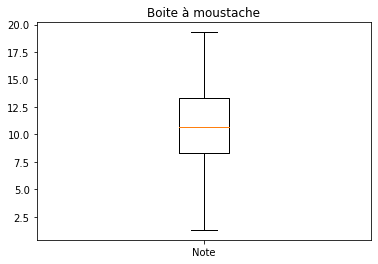

In [12]:
#Boite à moustache des notes 
plt.boxplot(df.Grade) ; plt.title("Boite à moustache") ;

plt.gca().xaxis.set_ticklabels(['Note']) ; plt.show()

In [13]:
#Classement des notes dans 5 catégories, du moins bon au plus bon
df["Grade_Categorie"] = df["Grade"].round(decimals = 0)

df['Grade_Categorie'] = df['Grade_Categorie'].replace([0.0], 'poor')
df['Grade_Categorie'] = df['Grade_Categorie'].replace([1.0], 'poor')
df['Grade_Categorie'] = df['Grade_Categorie'].replace([2.0], 'poor')
df['Grade_Categorie'] = df['Grade_Categorie'].replace([3.0], 'poor')
df['Grade_Categorie'] = df['Grade_Categorie'].replace([4.0], 'poor')
df['Grade_Categorie'] = df['Grade_Categorie'].replace([5.0], 'poor')

df['Grade_Categorie'] = df['Grade_Categorie'].replace([6.0], 'average')
df['Grade_Categorie'] = df['Grade_Categorie'].replace([7.0], 'average')
df['Grade_Categorie'] = df['Grade_Categorie'].replace([8.0], 'average')
df['Grade_Categorie'] = df['Grade_Categorie'].replace([9.0], 'average')

df['Grade_Categorie'] = df['Grade_Categorie'].replace([10.0],'quite_well')
df['Grade_Categorie'] = df['Grade_Categorie'].replace([11.0], 'quite_well')
df['Grade_Categorie'] = df['Grade_Categorie'].replace([12.0], 'quite_well')
df['Grade_Categorie'] = df['Grade_Categorie'].replace([13.0], 'quite_well')

df['Grade_Categorie'] = df['Grade_Categorie'].replace([14.0], 'good')
df['Grade_Categorie'] = df['Grade_Categorie'].replace([15.0], 'good')

df['Grade_Categorie'] = df['Grade_Categorie'].replace([16.0], 'very_good')
df['Grade_Categorie'] = df['Grade_Categorie'].replace([17.0], 'very_good')
df['Grade_Categorie'] = df['Grade_Categorie'].replace([18.0], 'very_good')
df['Grade_Categorie'] = df['Grade_Categorie'].replace([19.0], 'very_good')
df['Grade_Categorie'] = df['Grade_Categorie'].replace([20.0], 'very_good')

df['Grade_Categorie']

0         average
1            poor
2         average
3            good
4         average
          ...    
390       average
391          good
392       average
393    quite_well
394       average
Name: Grade_Categorie, Length: 395, dtype: object

In [14]:
#tableau des effectifs
df["Grade_categorie"] = df["Grade_Categorie"]
df.loc[(df["Grade_categorie"]=="very_good") & (df["absences"]>=10), ["Grade_categorie","absences"]]

,Grade_categorie,absences
69,very_good,12
113,very_good,10
198,very_good,24
260,very_good,21
265,very_good,13


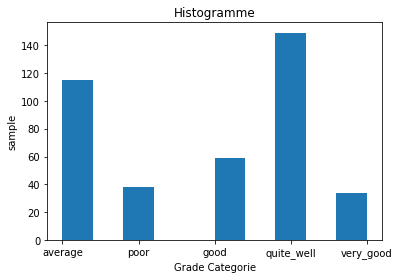

In [15]:
#Histogramme du nombre de personnes par catégorie de grade
plt.hist(df['Grade_Categorie'])
plt.title('Histogramme')
plt.xlabel('Grade Categorie')
plt.ylabel('sample')
plt.show()

# ****Graphique et statistiques****

****Notes & Ecole + ****

In [16]:
#tableau des effectifs
z = df.groupby(by=["school", "Grade_Categorie"], as_index=False).size()
sumgp = z[z.school == "GP"]['size'].sum()
summs = z[z.school == "MS"]['size'].sum()
coef = (z.school == "GP") * sumgp + (z.school == "MS") * summs
z["freq"] = z["size"] / coef
z

,school,Grade_Categorie,size,freq
0,GP,average,102,0.292264
1,GP,good,54,0.154728
2,GP,poor,32,0.091691
3,GP,quite_well,129,0.369628
4,GP,very_good,32,0.091691
5,MS,average,13,0.282609
6,MS,good,5,0.108696
7,MS,poor,6,0.130435
8,MS,quite_well,20,0.434783
9,MS,very_good,2,0.043478


<AxesSubplot:xlabel='school'>

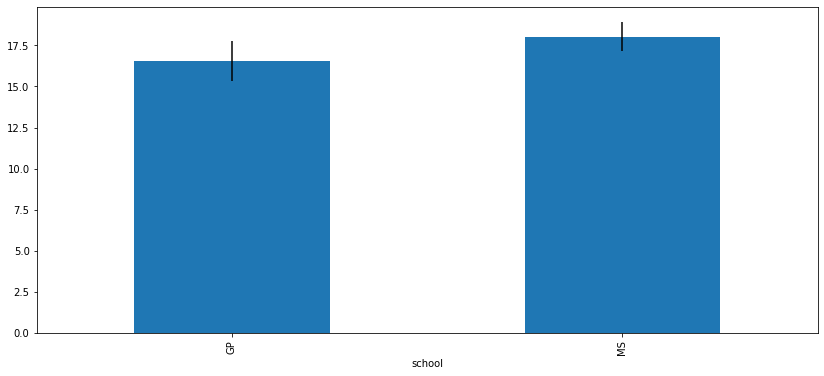

In [17]:
#Effectif dans les 2 écoles en fonction de l'age moyen
df_groupby_mean = df.groupby("school").mean()
df_groupby_std = df.groupby("school").std()

plt.figure(figsize = (14, 6))
df_groupby_mean["age"].plot.bar(yerr = df_groupby_std["age"])

In [18]:
#Effectif de l'école GP
a = df.loc[(df["school"]=="GP"), ["school"]]
GP_effectif = a.count() 
print(GP_effectif)

school    349
dtype: int64


In [19]:
#Effectif de l'école MS
b = df.loc[(df["school"]=="MS"), ["school"]]
MS_effectif = b.count() 
print(MS_effectif)

school    46
dtype: int64


****Notes & Education des parents****

<AxesSubplot:ylabel='Grade'>

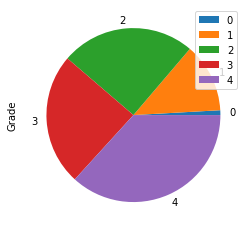

In [20]:
#Camembert du nombre de mères instruites en fonction de leur niveau d'études
df.groupby(['Medu']).sum().plot(kind='pie', y='Grade')

<AxesSubplot:ylabel='Grade'>

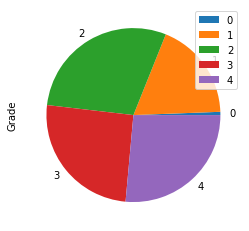

In [21]:
#Camembert du nombre de pères instruits en fonction de leur niveau d'études
df.groupby(['Fedu']).sum().plot(kind='pie', y='Grade')

****Notes & Job des parents****

<AxesSubplot:ylabel='Grade'>

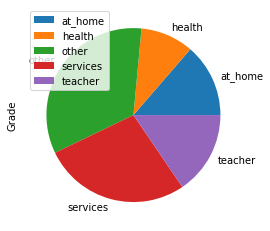

In [22]:
#Camembert du nombre de mères en fontion de leur travail 
df.groupby(['Mjob']).sum().plot(kind='pie', y='Grade')

<AxesSubplot:ylabel='Grade'>

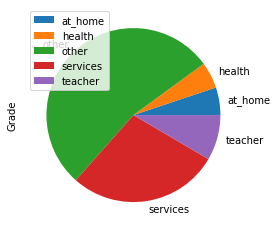

In [23]:
#Camembert du nombre de pères en fontion de leur travail 
df.groupby(['Fjob']).sum().plot(kind='pie', y='Grade')

****Note & Temps de transport****

<AxesSubplot:ylabel='Grade'>

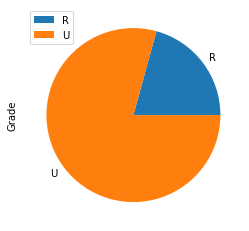

In [24]:
#Histogramme du temps de transport en fonction de l'effectif
df.groupby(['address']).sum().plot(kind='pie', y='Grade')

****Note & Situation amoureuse****

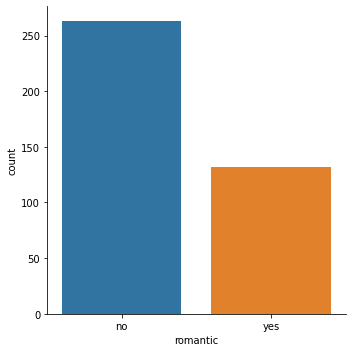

In [25]:
#Nombre d'étudiants en couple et célibataires
r = sns.catplot(x = "romantic", kind = "count", data = df)
r

****Absences + Assiduité & Age ****

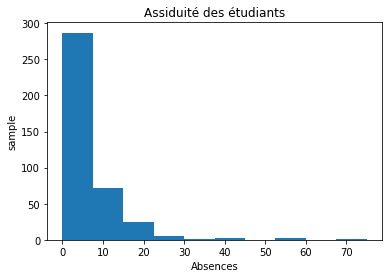

In [26]:
#Absences en fonction du nombre d'élèves
plt.hist(df['absences'])
plt.title('Assiduité des étudiants')
plt.xlabel('Absences')
plt.ylabel('sample')
plt.show()

In [27]:
#tableau des absences
df.groupby(by=["absences", "age"], as_index=False).size()

,absences,age,size
0,0,15,28
1,0,16,30
2,0,17,24
3,0,18,26
4,0,19,6
...,...,...,...
81,38,19,1
82,40,19,1
83,54,16,1
84,56,17,1


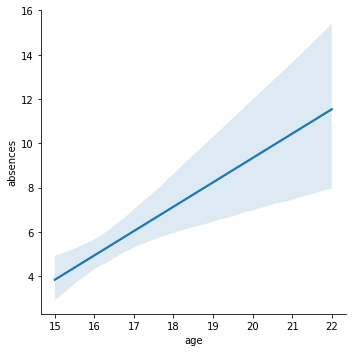

In [28]:
#Nombre d'heures d'absences en foinction de l'age
sns.lmplot(x="age",y="absences",data=df, scatter=False, palette="Set3")

****Consommation d'alcool****

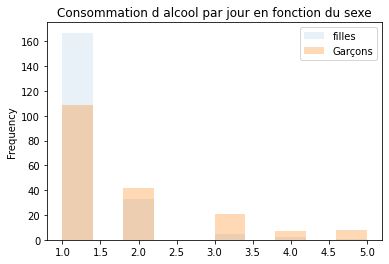

In [29]:
#Consommation d'alcool selon le sexe
### fig, ax = plt.subplots()
df_filles = df[(df['sex'] == "F")] #& (df['Dalc'] > 1)] #on extrait de df les filles
df_filles['Dalc'].plot.hist(label='filles', alpha=0.1,)
#ax.set_yscale('log')

df_garçons = df[(df['sex'] == "M")] #& (df['Dalc'] > 1)] #on extrait de df les garçons
df_garçons['Dalc'].plot.hist(label='Garçons', alpha=0.3,)

plt.legend(loc='upper right')
plt.title('Consommation d alcool par jour en fonction du sexe')
plt.show()

Text(0.5, 0.98, 'Age vs Goout')

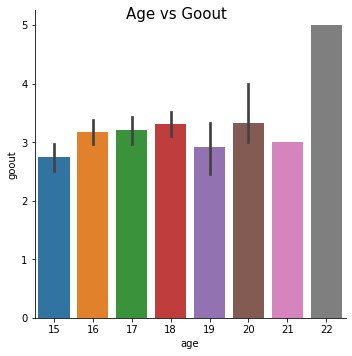

In [30]:
#La fréquence de sortie en fonction de l'age
ax=sns.catplot(x="age", y="goout",data=df,kind="bar")
ax.fig.suptitle("Age vs Goout",size=15)

# ****ARBRE DE DECISION****

In [31]:
label = df['goout'] #critère de recherche : fréquence de sortie 
label

0      4
1      3
2      2
3      2
4      2
      ..
390    4
391    5
392    3
393    1
394    3
Name: goout, Length: 395, dtype: int64

In [32]:
#Choix des paramètres de l'échantillon
data = df[['school', 'sex', 'age', 'Dalc', 'Walc']]
data.head()

,school,sex,age,Dalc,Walc
0,GP,F,18,1,1
1,GP,F,17,1,1
2,GP,F,15,2,3
3,GP,F,15,1,1
4,GP,F,16,1,2


In [33]:
# Replace values of columns by using astype property.
data['sex'] = (data['sex'] == 'male').astype('int')
data['sex']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0      0
1      0
2      0
3      0
4      0
      ..
390    0
391    0
392    0
393    0
394    0
Name: sex, Length: 395, dtype: int64

In [34]:
# on remplace school en int : 0 pour GP et 1 pour MS
data['school'] = (data['school'] == 'GP').astype('int')
data['school']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0      1
1      1
2      1
3      1
4      1
      ..
390    0
391    0
392    0
393    0
394    0
Name: school, Length: 395, dtype: int64

In [35]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(min_samples_split = 50)
clf.fit(data, label)

DecisionTreeClassifier(min_samples_split=50)

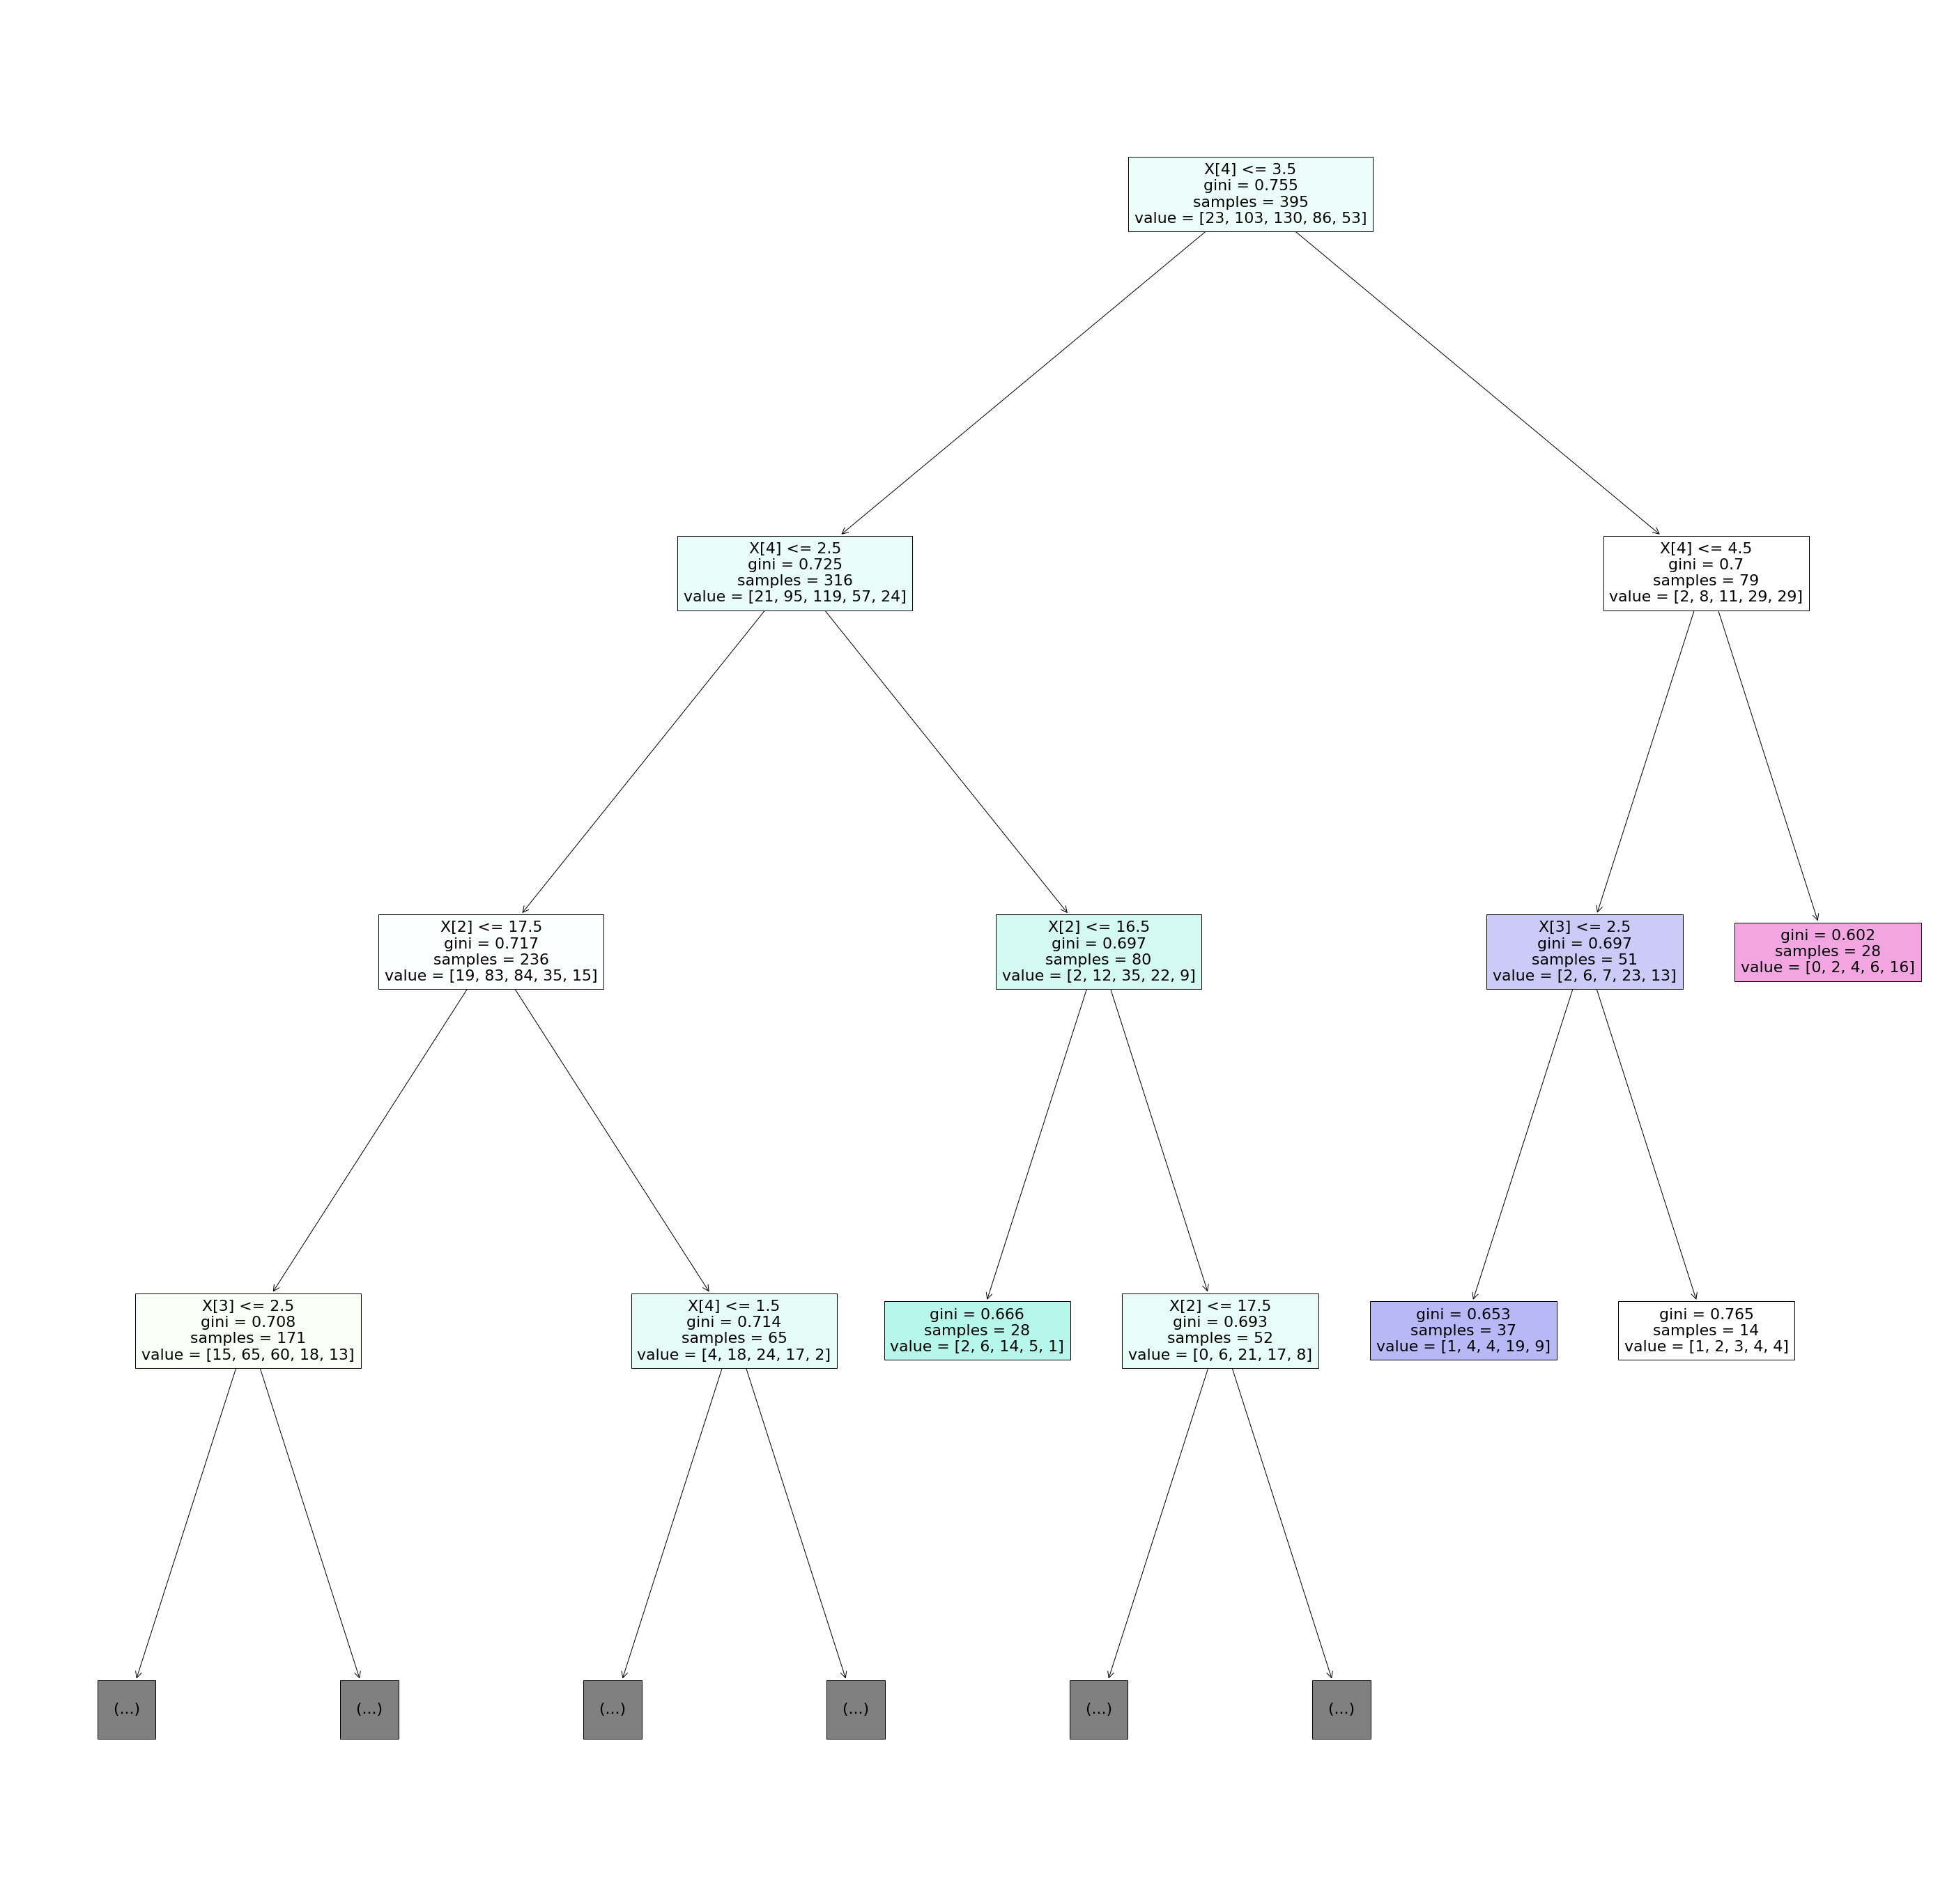

In [37]:
from matplotlib import pyplot as plt
from sklearn import tree

plt.figure(figsize = (50, 50))
tree.plot_tree(clf, max_depth = 3, filled = True)
plt.show()

# ****Matrice de corrélation****

In [38]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
df.corr(method='spearman').style.format("{:.2}").background_gradient(cmap=pyplot.get_cmap('coolwarm'))

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,Grade,Etendue
age,1.0,-0.16,-0.15,0.11,0.032,0.24,0.031,0.0003,0.14,0.097,0.13,-0.075,0.15,-0.14,-0.029
Medu,-0.16,1.0,0.63,-0.15,0.063,-0.24,0.012,0.028,0.065,0.023,-0.044,-0.036,0.098,0.23,-0.14
Fedu,-0.15,0.63,1.0,-0.15,0.018,-0.24,0.011,-0.017,0.048,0.004,-0.014,0.018,0.0036,0.18,-0.1
traveltime,0.11,-0.15,-0.15,1.0,-0.11,0.08,-0.039,-0.022,-0.0014,0.066,0.064,-0.015,-0.025,-0.12,-0.00091
studytime,0.032,0.063,0.018,-0.11,1.0,-0.16,0.058,-0.13,-0.066,-0.22,-0.26,-0.091,-0.046,0.12,-0.084
failures,0.24,-0.24,-0.24,0.08,-0.16,1.0,-0.051,0.088,0.11,0.19,0.13,0.08,0.096,-0.37,0.26
famrel,0.031,0.012,0.011,-0.039,0.058,-0.051,1.0,0.14,0.064,-0.11,-0.12,0.085,-0.087,0.032,-0.02
freetime,0.0003,0.028,-0.017,-0.022,-0.13,0.088,0.14,1.0,0.29,0.19,0.13,0.089,0.013,0.00068,0.00069
goout,0.14,0.065,0.048,-0.0014,-0.066,0.11,0.064,0.29,1.0,0.26,0.39,-0.019,0.13,-0.16,0.0069
Dalc,0.097,0.023,0.004,0.066,-0.22,0.19,-0.11,0.19,0.26,1.0,0.64,0.095,0.13,-0.11,-0.022
